In [2]:
from copy import deepcopy
from radd.toolbox.theta import get_optimized_params
from radd import fit, models, build
from radd.toolbox.analyze import ensure_numerical_wts
from radd.toolbox.messages import logger
from numpy import array
from radd import models
from lmfit import Parameters, minimize
from radd import fit

# Build Model & Optimizer Objects

In [5]:
os.chdir(pth+'TEST_NEW_FITS/')
%cd RE_TESTS/

data=redf_store.redata
depends_on = {'v':'Cond'}
kind = 'xradd'
dynamic='hyp'
m=build.Model(data=data, depends_on=depends_on, dynamic=dynamic, kind=kind, multiopt=True)
#m.inits.pop('z')
#m.inits['xb'] = 2
m.optimize(tol=1e-5, ntrials=10000, maxfev=500)

/Users/kyle/Dropbox/TEST_NEW_FITS/RE_TESTS

      Model is prepared to fit xradd model (w/ hyp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of Cond (bsl, pnl)

      It'll probably work this time 

at minimum 0.0028 accepted 1
at minimum 0.0028 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0026 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0025 accepted 1
at minimum 0.0026 accepted 1
at minimum 0.0024 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0016 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0016 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0016 accepted 1
at minimum 0.0016 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0015 accepted 1
at minimum 0.0016 accepted 1
at minimum 0.0

In [8]:
os.chdir(pth+'TEST_NEW_FITS/RE_TESTS')
#%cd RE_TESTS
data=redf_store.redata
depends_on = {'v':'Cond'}
kind = 'xradd'
dynamic='exp'
m=build.Model(data=data, depends_on=depends_on, dynamic='exp', kind=kind, split=50, include_zero_rts=0, multiopt=True)
#m.inits.pop('z')
m.inits['xb'] = 2


      Model is prepared to fit xradd model (w/ exp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of Cond (bsl, pnl)

      'They dont think it be like it is, but it do' -Oscar Gamble 



In [ ]:
m.optimize(tol=.001, ntrials=5000, maxfev=100)

In [ ]:
m.simulate()

In [12]:
zip(m.avg_y, m.fits)

[(array([ 0.93303,  0.99832,  0.99475,  0.92163,  0.52271,  0.11097,
          0.51926,  0.54445,  0.56167,  0.5793 ,  0.60277,  0.5118 ,
          0.53454,  0.55022,  0.5681 ,  0.59144]), 0.96934289021402698),
 (array([ 0.91655,  1.     ,  0.99571,  0.94848,  0.60625,  0.19046,
          0.52269,  0.54909,  0.56819,  0.58504,  0.60809,  0.51988,
          0.54233,  0.55632,  0.57324,  0.59786]), 1.0120216520149818)]

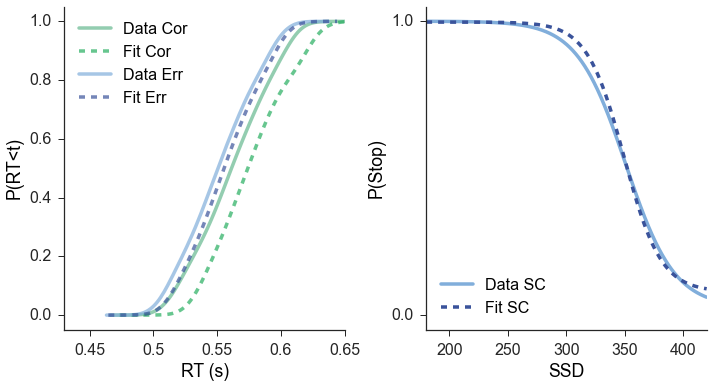

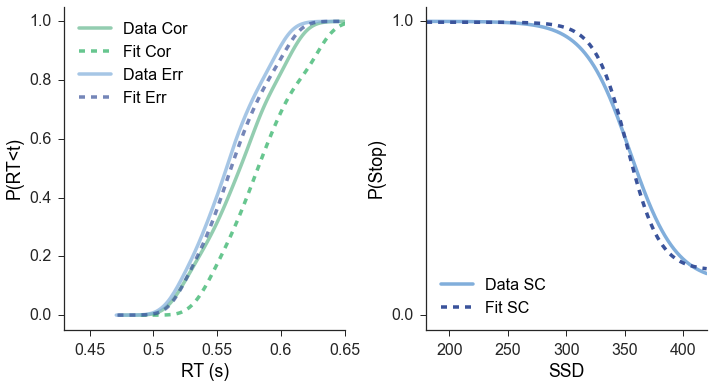

In [15]:
from radd import vis
for y, yhat in zip(m.avg_y, m.fits.reshape(2,16)):
      
      vis.plot_fits(y, yhat, kind='radd')

In [25]:
#fp = m.set_fitparams(tol=.001, maxfev=50, ntrials=2500, get_params=True)

m.__check_inits__()

inits = dict(deepcopy(m.inits))

opt = fit.Optimizer(dframes=m.dframes, fitparams=fp, kind=m.kind, inits=inits, depends_on=m.depends_on, fit_on=m.fit_on, wts=m.wts, pc_map=m.pc_map, multiopt=True)

NameError: name 'fp' is not defined

In [664]:
opt.basin

                  nfev: 319
 minimization_failures: 0
                   fun: 6.4839296159123721e-05
                     x: array([ 1.38793,  1.49569,  1.63167,  1.76764,  1.90361,  2.03958])
               message: ['success condition satisfied']
                   nit: 2

In [675]:
m.inits['tr'] = basin.x

In [681]:
simulator.simulate_pro(m.inits)

array([ 0.41155,  0.46931,  0.42599,  0.42599,  0.48014,  0.46209,
        0.5112 ,  0.52533,  0.5337 ,  0.5412 ,  0.5497 ,  0.51546,
        0.52608,  0.5352 ,  0.5422 ,  0.55194])

In [689]:
opt.basin.x

array([ 0.3721 ,  0.3215 ,  0.32824,  0.29265,  0.32772,  0.29323])

In [685]:
lmParams.pretty_print()

Parameters({
    'v_0': <Parameter 'v_0', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'v_20': <Parameter 'v_20', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'v_40': <Parameter 'v_40', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'v_60': <Parameter 'v_60', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'v_80': <Parameter 'v_80', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'v_100': <Parameter 'v_100', 1.6960999999999999, bounds=[0.0001:4.0]>, 
    'a': <Parameter 'a', value=0.4748 (fixed), bounds=[0.001:1.0]>, 
    'xb': <Parameter 'xb', value=0.09 (fixed), bounds=[0.01:10]>, 
    'z': <Parameter 'z', value=0.001 (fixed), bounds=[0.001:0.9]>, 
    'tr': <Parameter 'tr', value=0.2725 (fixed), bounds=[0.1:0.55]>, 
    })



In [692]:
opt.basin.x

array([ 0.37443,  0.31093,  0.30389,  0.32597,  0.33074,  0.31697])

In [699]:
opt.basin.x

array([ 0.20321])

In [702]:
opt.optimize_model()

at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
at minimum 0.0000 accepted 1
Parameters({
    'tr_0': <Parameter 'tr_0', 0.37192247224568975, bounds=[0.1:0.55]>, 
    'tr_20': <Parameter 'tr_20', 0.3493074183749153, bounds=[0.1:0.55]>, 
    'tr_40': <Parameter 'tr_40', 0.32404826346270965, bounds=[0.1:0.55]>, 
    'tr_60': <Parameter 'tr_60', 0.30391605415529144, bounds=[0.1:0.55]>, 
    'tr_80': <Parameter 'tr_80', 0.25648242894291007, bounds=[0.1:0.55]>, 
    'tr_100': <Parameter 'tr_100', 0.23567729432524392, bounds=[0.1:0.55]>, 
    })



(array([ 0.89598,  0.73913,  0.47924,  0.24638,  0.0822 ,  0.08887,
         0.53244,  0.54358,  0.55382,  0.59752,  0.55749,  0.52379,
         0.5004 ,  0.43722,  0.51697,  0.54125]),
 {'AIC': -81.584329734221896,
  'BIC': -76.948797400783207,
  'CNVRG': False,
  'a': array([ 0.32583]),
  'chi': 0.028827211,
  'nfev': 50,
  'rchi': 0.0028827210888266565,
  'tr_0': 0.37254519484319903,
  'tr_100': 0.23634044872822793,
  'tr_20': 0.34938354780399805,
  'tr_40': 0.32401873301015321,
  'tr_60': 0.30326386990639054,
  'tr_80': 0.25884997169479718,
  'v': array([ 1.3845]),
  'xb': array([ 0.08945]),
  'z': 0.00019230435772400002},
 {'a': array([ 0.32583]),
  'tr_0': 0.37254519484319903,
  'tr_100': 0.23634044872822793,
  'tr_20': 0.34938354780399805,
  'tr_40': 0.32401873301015321,
  'tr_60': 0.30326386990639054,
  'tr_80': 0.25884997169479718,
  'v': array([ 1.3845]),
  'xb': array([ 0.08945]),
  'z': 0.00019230435772400002})

# Setup Model/Parameters

In [527]:
inits

{'a': 0.3267, 'tr': 0.3192, 'v': 1.3813, 'xb': 0.09, 'z': 0}

In [587]:
pnames = deepcopy(opt.pnames)
pfit = list(set(m.inits.keys()).intersection(pnames))
lim = set_bounds(dynamic=m.dynamic)
fp = m.fitparams
fp['tol']=.0001
fp['maxfev']=1000
is_flat = False

ip = deepcopy(inits)
lmParams=Parameters()

for pkey, pc_list in m.pc_map.items():
      if is_flat: 
            break
      else:
            pfit.remove(pkey)
            #bump = np.linspace(.8,1.20,opt.ncond)
            bump=np.ones(opt.ncond)
            if pkey in ['a', 'tr']:                        
                  bump = bump[::-1]
            vals = ip[pkey]*bump
            
      mn = lim[pkey][0]; mx=lim[pkey][1]
      d0 = [lmParams.add(pc, value=vals[i], vary=1, min=mn, max=mx) for i, pc in enumerate(pc_list)]

p0 = [lmParams.add(k, value=ip[k], vary=is_flat, min=lim[k][0], max=lim[k][1]) for k in pfit]
opt_kws = {'disp':fp['disp'], 'xtol':fp['tol'], 'ftol':fp['tol'], 'maxfev':fp['maxfev']}

simulator = models.Simulator(model=m, inits=lmParams.valuesdict())
if is_flat:
      simulator.wts = fp['fwts']
      simulator.y = fp['flat_y']
else:
      simulator.wts = m.wts
      simulator.y = m.avg_y
p = simulator.vectorize_params(m.inits)

In [581]:
simulator = models.Simulator(model=m, inits=lmParams.valuesdict())

# Fit Model

In [500]:
def cost_fx_local(p):
      
      yhat = simulator.sim_fx(p.valuesdict(), analyze=True)
      cost = (yhat - simulator.y)*simulator.wts
      return cost

In [549]:
from lmfit import report_fit
report_fit(optp)


[[Variables]]
    tr_0:     0.31909833 (init= 0.3192)
    tr_20:    0.31910618 (init= 0.3192)
    tr_40:    0.31910566 (init= 0.3192)
    tr_60:    0.31910255 (init= 0.3192)
    tr_80:    0.31910552 (init= 0.3192)
    tr_100:   0.31910322 (init= 0.3192)
    a:        0.3267 (fixed)
    xb:       0.09 (fixed)
    z:        0.001 (fixed)
    v:        1.3813 (fixed)
[[Correlations]] (unreported correlations are <  0.100)


In [551]:
# OPTIMIZE THETA
optmod = minimize(simulator.__cost_fx__, lmParams, method='ba')#, options={'maxfev':1000})#opt_kws)
optp = optmod.params
finfo = {k:optp[k].value for k in optp.keys()}
popt = deepcopy(finfo)
residual = optmod.residual
yhat = simulator.y + residual
wts = simulator.wts
log_arrays = {'y': simulator.y, 'yhat':yhat, 'wts':wts}
logger(optmod=optmod, finfo=finfo, depends_on=fp['depends_on'], log_arrays=log_arrays, kind=m.kind, fit_id='test tr')

In [584]:
p = simulator.vectorize_params(m.inits)

KeyError: 'v'

In [557]:
p['a'] = p['a'][0]
p['tr'] = p['tr'][0]

{'a': array([ 0.3267,  0.3267,  0.3267,  0.3267,  0.3267,  0.3267]),
 'tr': array([ 0.3192,  0.3192,  0.3192,  0.3192,  0.3192,  0.3192]),
 'v': array([ 1.3813,  1.3813,  1.3813,  1.3813,  1.3813,  1.3813]),
 'xb': array([ 0.09,  0.09,  0.09,  0.09,  0.09,  0.09]),
 'z': 0}

In [565]:
vals

array([ 1.10504,  1.21554,  1.32605,  1.43655,  1.54706,  1.65756])

In [602]:

for pkey, pc_list in m.pc_map.items():
      if is_flat: 
            break
      else:
            #pfit.remove(pkey)
            bump = np.linspace(.8,1.20,opt.ncond)
            #bump=np.ones(opt.ncond)
            if pkey in ['a', 'tr']:                        
                  bump = bump[::-1]
            vals = ip[pkey]*bump
      for v in vals:
            m.inits[pkey] = vals
      #mn = lim[pkey][0]; mx=lim[pkey][1]
      #d0 = [lmParams.add(pc, value=vals[i], vary=1, min=mn, max=mx) for i, pc in enumerate(pc_list)]


In [603]:
m.inits

{'a': 0.4748,
 'tr': 0.2725,
 'v': array([ 1.35688,  1.49257,  1.62826,  1.76394,  1.89963,  2.03532]),
 'xb': 0.09,
 'z': 0}

In [623]:
data=prodf_store.prodata
depends_on = {'v':'pGo'}
kind = 'xpro'

m=build.Model(data=data, depends_on=depends_on, kind=kind, split=50, include_zero_rts=0)
fp = m.set_fitparams(tol=.00001, get_params=True)

m.__check_inits__()

inits = dict(deepcopy(m.inits))

opt = fit.Optimizer(dframes=m.dframes, fitparams=fp, kind=m.kind, inits=inits, depends_on=m.depends_on, fit_on=m.fit_on, wts=m.wts, pc_map=m.pc_map)




for pkey, pc_list in m.pc_map.items():
      if is_flat: 
            break
      else:
            #pfit.remove(pkey)
            bump = np.linspace(.8,1.20,opt.ncond)
            #bump=np.ones(opt.ncond)
            if pkey in ['a', 'tr']:                        
                  bump = bump[::-1]
            vals = ip[pkey]*bump
      for v in vals:
            m.inits[pkey] = vals
      #mn = lim[pkey][0]; mx=lim[pkey][1]
      #d0 = [lmParams.add(pc, value=vals[i], vary=1, min=mn, max=mx) for i, pc in enumerate(pc_list)]

simulator = models.Simulator(m)
simulator.minimize_simulator_params = m.inits
simulator.minimize_simulator_name = 'v'
simulator.y = m.avg_y



      Model is prepared to fit xpro model (w/ hyp dynamic bias) to average data,
      allowing Drift-Rate to vary across levels of pGo (0, 20, 40, 60, 80, 100)

      It'll probably work this time 



In [630]:
x = m.inits['v']
x

array([ 1.35688,  1.49257,  1.62826,  1.76394,  1.89963,  2.03532])

In [625]:
def print_fun(x, f, accepted):
      print("at minimum %.4f accepted %d" % (f, int(accepted)))

In [634]:
m.inits['v'] = array([ 1.39269,  1.48635,  1.6373 ,  1.77374,  1.91019,  2.04663])

In [636]:
m.inits

{'a': array([ 0.4748,  0.4748,  0.4748,  0.4748,  0.4748,  0.4748]),
 'tr': array([ 0.2725,  0.2725,  0.2725,  0.2725,  0.2725,  0.2725]),
 'v': array([ 1.39269,  1.48635,  1.6373 ,  1.77374,  1.91019,  2.04663]),
 'xb': array([ 0.09,  0.09,  0.09,  0.09,  0.09,  0.09]),
 'z': 0}

In [635]:
simulator.sim_fx(m.inits)

array([ 0.91697,  0.84838,  0.59567,  0.23466,  0.07581,  0.00722,
        0.52134,  0.534  ,  0.542  ,  0.5485 ,  0.55579,  0.4987 ,
        0.5085 ,  0.51583,  0.52317,  0.53246])

In [632]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method":"Nelder-Mead", "jac":True}
basin = basinhopping(simulator.minimize_simulator, x, stepsize=.5, minimizer_kwargs=minimizer_kwargs, niter_success=1, callback=print_fun)

at minimum 0.0072 accepted 1
at minimum 0.0072 accepted 1


                  nfev: 359
 minimization_failures: 0
                   fun: 1.4643028571569429e-06
                     x: array([ 1.39269,  1.48635,  1.6373 ,  1.77374,  1.91019,  2.04663])
               message: ['success condition satisfied']
                   nit: 2

In [582]:
x = m.inits.pop('v')

In [583]:
x

1.6961

In [405]:
def set_bounds(a=(.001, 1.000), tr=(.01, .55), v=(.0001, 4.0000), z=(.001, .900), ssv=(-4.000, -.0001), xb=(.01,10), si=(.001, .2), dynamic='hyp'):

      """ set and return boundaries to limit search space
      of parameter optimization in <optimize_theta>
      """

      if dynamic == 'exp':
            xb = (.01, 10)
      elif dynamic == 'hyp':
            #xb = (.001, .1)
            xb = (.01, 10)

      if 'irace' in kind:
            ssv=(abs(ssv[1]), abs(ssv[0]))

      bounds = {'a': a, 'tr': tr, 'v': v, 'ssv': ssv, 'z': z, 'xb':xb, 'si':si}
      return bounds


In [31]:
p = m.sim.vectorize_params(p)

In [309]:
m.opt.lmParams

Parameters([('tr_0', <Parameter 'tr_0', 0.32008138204308784, bounds=[0.001:0.55]>), ('tr_20', <Parameter 'tr_20', 0.32008138204308784, bounds=[0.001:0.55]>), ('tr_40', <Parameter 'tr_40', 0.32008138204308784, bounds=[0.001:0.55]>), ('tr_60', <Parameter 'tr_60', 0.32008138204308784, bounds=[0.001:0.55]>), ('tr_80', <Parameter 'tr_80', 0.32008138204308784, bounds=[0.001:0.55]>), ('tr_100', <Parameter 'tr_100', 0.32008138204308784, bounds=[0.001:0.55]>), ('a', <Parameter 'a', value=0.32511466588689114 (fixed), bounds=[0.001:1.0]>), ('z', <Parameter 'z', value=0.0010029295479902526 (fixed), bounds=[0.001:0.9]>), ('v', <Parameter 'v', value=1.3800721260201678 (fixed), bounds=[0.0001:4.0]>)])

In [498]:
p = simulator.vectorize_params(p)
t = np.cumsum([.0005]*600)
x = simulator.temporal_dynamics(p, t)
plt.plot(x[0])

In [50]:
ex = np.exp(2.5*t)
hy = np.cosh(2.5*t)

In [51]:
plt.plot(hy)